# Data Analysis of a Health insurance data set.
## The goal of this analysis is to find the effect of different attributes on the insurance claim. 
## To do that visualization, statistical tests and model training are appliead

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene, ttest_ind, kstest
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


### Import data set

In [2]:
df = pd.read_csv("C:/Users/n0rs9/PycharmProjects/pythonProject/Health Insurance Data Analysis/1651277648862_healthinsur\
ance.csv", decimal=".", sep=",")

In [3]:
orig_df = df.copy()

## changing categorical values to numbers (Needed for modelling of the data later)

In [4]:
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [5]:
df.describe()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [7]:
df["bloodpressure"].value_counts().get(0, 0)

756

### removing all rows with 0 in bloodpressure as it is no valid value
### also removing all rows with NA from age and bmi

In [8]:
df.dropna(axis=0, inplace=True)
df.drop(df.loc[df["bloodpressure"] == 0].index, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12958 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  12958 non-null  float64
 1   sex                  12958 non-null  object 
 2   weight               12958 non-null  int64  
 3   bmi                  12958 non-null  float64
 4   hereditary_diseases  12958 non-null  object 
 5   no_of_dependents     12958 non-null  int64  
 6   smoker               12958 non-null  int64  
 7   city                 12958 non-null  object 
 8   bloodpressure        12958 non-null  int64  
 9   diabetes             12958 non-null  int64  
 10  regular_ex           12958 non-null  int64  
 11  job_title            12958 non-null  object 
 12  claim                12958 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.4+ MB


In [10]:
df.describe()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,12958.000000,12958.000000,12958.000000,12958.000000,12958.000000,12958.000000,12958.000000,12958.000000,12958.000000
mean,39.524232,64.570381,30.262116,1.110974,0.199954,72.283146,0.782065,0.220482,13441.408404
std,14.089297,13.564066,6.141282,1.214650,0.399981,11.576544,0.412859,0.414587,12159.024990
min,18.000000,34.000000,16.800000,0.000000,0.000000,40.000000,0.000000,0.000000,1135.900000
25%,27.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4837.600000
50%,40.000000,63.000000,29.300000,1.000000,0.000000,72.000000,1.000000,0.000000,9704.700000
75%,52.000000,75.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16531.375000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


## First visualizations

### correlation

Text(0.5, 1.0, 'Correlation Heatmap')

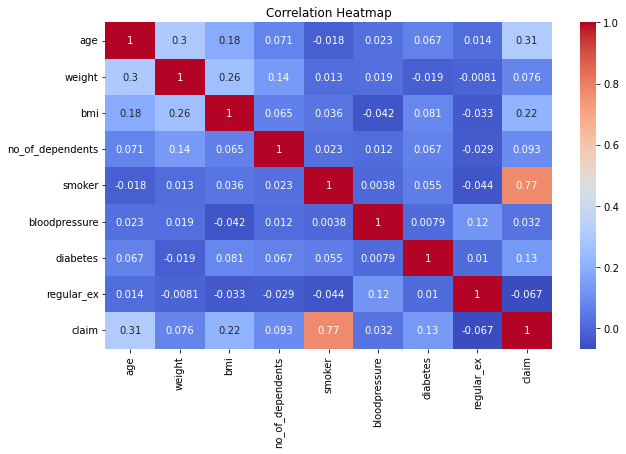

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

## The effect of smoking on the claim
### exploring the smoking attribute
#### 0 = not smoking, 1 = smoking

In [12]:
df["smoker"].corr(df["claim"])

0.7710262483261955

In [13]:
df["smoker"].skew()

1.5005354982398322

In [14]:
df["smoker"].value_counts()

0    10367
1     2591
Name: smoker, dtype: int64

### Average claim of smoker vs non smoker

### Pie plot of smoker %

Text(0.5, 1.0, 'Smoker Percentage')

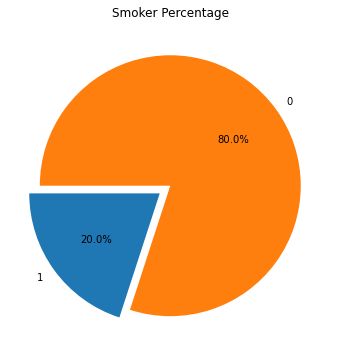

In [15]:
plt.figure(figsize=(10, 6))
plt.pie(df.smoker.value_counts().reindex([1, 0]), labels=df.smoker.value_counts().reindex([1, 0]).index,
        autopct='%1.1f%%', explode=[0.1, 0], startangle=180)
plt.title('Smoker Percentage')

### boxplot of claim

Mean Smoker: 32193.25
Mean Nonsmoker: 8754.80
Median Smoker: 34779.60
Median Nonsmoker: 7624.60


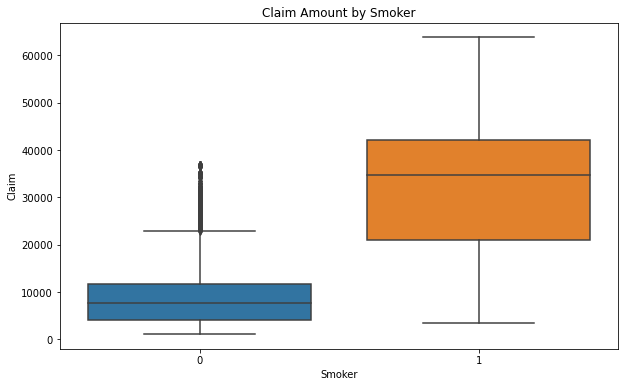

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='smoker', y='claim', data=df)
plt.title('Claim Amount by Smoker')
plt.xlabel('Smoker')
plt.ylabel('Claim')
print(f"Mean Smoker: {df[df['smoker'] == 1]['claim'].mean():.2f}")
print(f"Mean Nonsmoker: {df[df['smoker'] == 0]['claim'].mean():.2f}")
print(f"Median Smoker: {df[df['smoker'] == 1]['claim'].median():.2f}")
print(f"Median Nonsmoker: {df[df['smoker'] == 0]['claim'].median():.2f}")

## statistical testing


In [17]:
alpha = 0.05

### normal distribution using Kolmogorov-Smirnov test

In [18]:
print(kstest(df[df["smoker"] == 1]["claim"], "norm"))
print(kstest(df[df["smoker"] == 0]["claim"], "norm"))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


### test on variance using Levene

In [19]:
stat, p = levene(df[df["smoker"] == 1]["claim"], df[df["smoker"] == 0]["claim"], center="mean")
print("Statistics=%.3f, p=%.3f" % (stat, p))

Statistics=3559.518, p=0.000


### Although not normally distributed or homogenity of variances was achieved Welch´s t-test was used because of large sample size

In [20]:
statistics, pwt = ttest_ind(df[df["smoker"] == 1]["claim"], df[df["smoker"] == 0]["claim"], equal_var=False)

print("Statistics=%.3f, p=%.3f" % (statistics, pwt))

if pwt < alpha:
    print("There is a significant difference in claims between people who smoke and dont smoke.")
else:
    print("There is no difference in claims between people who smoke and dont smoke.")

Statistics=96.547, p=0.000
There is a significant difference in claims between people who smoke and dont smoke.


### direction of the difference

In [21]:
if statistics > 0:
    print("The mean insurance claim of people who smoke is significantly higher than of people who dont smoke")
elif statistics < 0:
    print("The mean insurance claim of people who dont smoke is significantly higher than of people who smoke")
else:
    print("There is no significant difference in the mean insurance claim amounts.")

The mean insurance claim of people who smoke is significantly higher than of people who dont smoke


## Male vs Female

In [22]:
df["sex"].value_counts()

female    6707
male      6251
Name: sex, dtype: int64

In [23]:
df["sex"] = df["sex"].map({"male": 1, "female": 0})

In [24]:
df['sex'].corr(df['claim'])

0.05277997159565034

In [25]:
df["sex"] = df["sex"].map({1: "male", 0: "female"})

### Boxplot

Mean Male: 14106.131163013906
Mean Female: 12821.879260474154
Median Male: 9730.9
Median Female: 9634.5


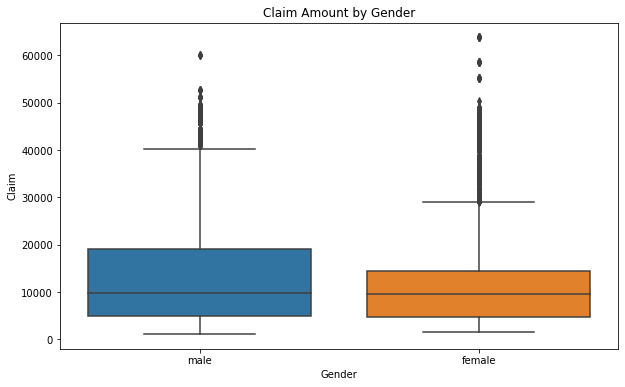

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='claim', data=df)
plt.title('Claim Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Claim')
print(f"Mean Male: {df[df['sex'] == 'male']['claim'].mean()}")
print(f"Mean Female: {df[df['sex'] == 'female']['claim'].mean()}")
print(f"Median Male: {df[df['sex'] == 'male']['claim'].median()}")
print(f"Median Female: {df[df['sex'] == 'female']['claim'].median()}")

### Median seems to be close although mean is quite different

### Gender count for smoker as smoking has a very high effect on insurance claim

Text(0, 0.5, 'Count')

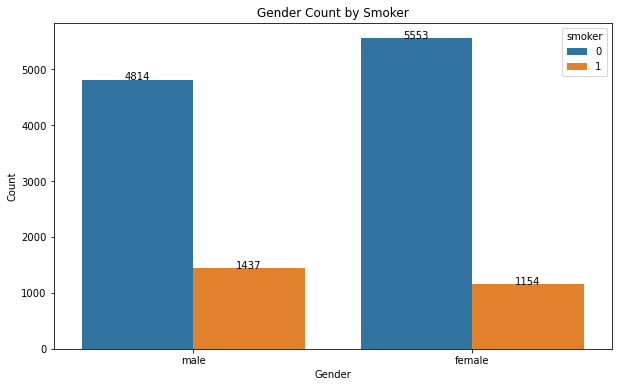

In [27]:
plt.figure(figsize=(10, 6))
fig = sns.countplot(x='sex', data=df, hue='smoker')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2., height + 3, '{:1.0f}'.format(height), ha="center")
plt.title('Gender Count by Smoker')
plt.xlabel('Gender')
plt.ylabel('Count')

### Proportion of smokers in males higher, which could lead to higher mean in claims

In [28]:
print(f"Mean of males that dont smoke: {df[(df['sex'] == 'male') & (df['smoker'] == 0)]['claim'].mean():.2f}")
print(f"Mean of females that dont smoke: {df[(df['sex'] == 'female') & (df['smoker'] == 0)]['claim'].mean():.2f}")
print(f"Mean of males that smoke: {df[(df['sex'] == 'male') & (df['smoker'] == 1)]['claim'].mean():.2f}")
print(f"Mean of females that smoke: {df[(df['sex'] == 'female') & (df['smoker'] == 1)]['claim'].mean():.2f}")

Mean of males that dont smoke: 8512.05
Mean of females that dont smoke: 8965.25
Mean of males that smoke: 32846.48
Mean of females that smoke: 31379.83


#### The mean claim of women that dont smoke is higher than their male counterparts.
#### But the mean claim of men who smoke is higher than that of women, which explains the difference in claims overall.

### Statistical testing

In [29]:
print(kstest(df[df["sex"] == "female"]["claim"], "norm"))
print(kstest(df[df["sex"] == "male"]["claim"], "norm"))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


In [30]:
stat, p = levene(df[df["sex"] == "female"]["claim"], df[df["sex"] == "male"]["claim"], center="mean")
print("Statistics=%.3f, p=%.3f" % (stat, p))

Statistics=135.533, p=0.000


In [31]:
statistics, pwt = ttest_ind(df[df['sex'] == 'female']['claim'], df[df['sex'] == 'male']['claim'], equal_var=False)

print('Statistics=%.3f, p=%.3f' % (statistics, pwt))

if pwt < alpha:
    print('There is a significant difference in claims between females and males')
else:
    print('There is no difference in claims between females and males')

if statistics > 0:
    print("The mean insurance claim amount of females is significantly higher than females.")
elif statistics < 0:
    print("The mean insurance claim amount of males is significantly higher than females.")
else:
    print("There is no significant difference in the mean insurance claim amounts.")

Statistics=-5.994, p=0.000
There is a significant difference in claims between females and males
The mean insurance claim amount of males is significantly higher than females.


## The Effect of Age on the claim
### To do this Age was split into older (>=50) and younger (<50)

In [32]:
df["age"].corr(df["claim"])

0.31014575074801876

Skewness: 0.020214061543238057
Mean: 40
Median: 40.0
Minimum Age: 18.0
Maximum Age: 64.0


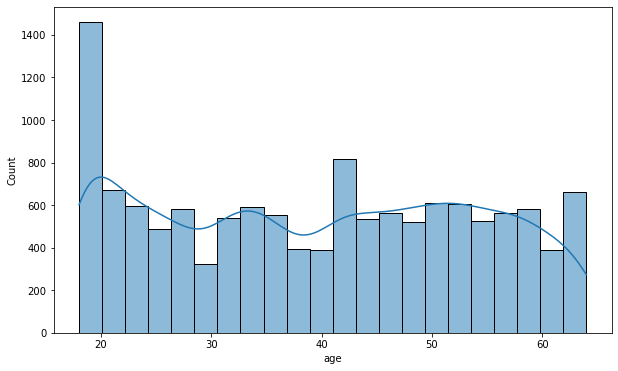

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df["age"], kde=True)
print(f"Skewness: {df['age'].skew()}")
print(f'Mean: {(df["age"].mean()):.0f}')
print(f'Median: {df["age"].median()}')
print(f'Minimum Age: {df["age"].min()}')
print(f'Maximum Age: {df["age"].max()}')

#### symetrical normal

Text(0, 0.5, 'Sample quantiles')

<Figure size 720x432 with 0 Axes>

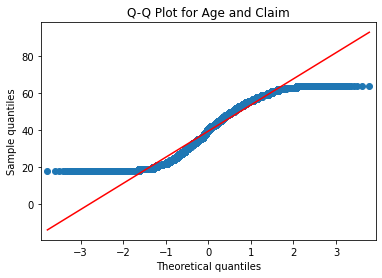

In [34]:
plt.figure(figsize=(10, 6))
sm.qqplot(df["age"], line='s')
plt.title("Q-Q Plot for Age and Claim")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")

Text(0, 0.5, 'Claim')

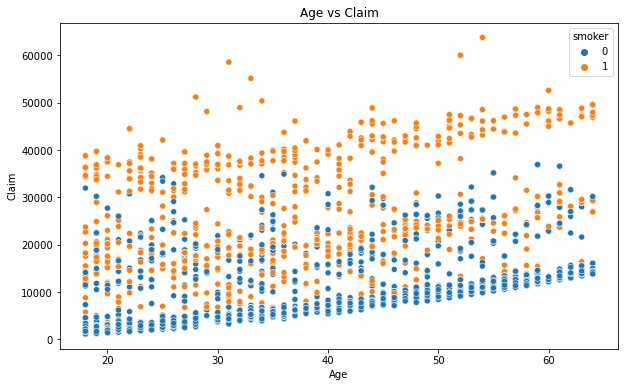

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='claim', data=df, hue='smoker')
plt.title('Age vs Claim')
plt.xlabel('Age')
plt.ylabel('Claim')

### Looking at the scatter plot, it can be determined that the age column has a positive correlation with the claims column, meaning that as the client's age increases, their claims also tend to increase. It is also evident that the claims for smokers are significantly higher than those for non-smokers.

Mean above 50: 18076.85
Mean below 50: 11421.33
Median above 50: 12622.2
Median below 50: 6600.2


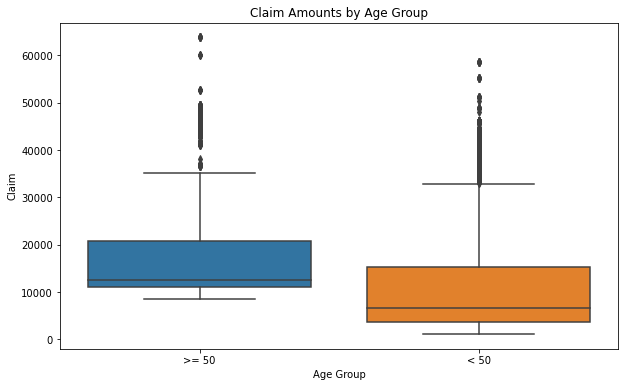

In [36]:
plt.figure(figsize=(10, 6))
df['Age Group'] = np.where(df['age'] < 50, '< 50', '>= 50')
sns.boxplot(x='Age Group', y='claim', data=df)
plt.title("Claim Amounts by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Claim")
print(f"Mean above 50: {df[df['Age Group'] == '>= 50']['claim'].mean():.2f}")
print(f"Mean below 50: {df[df['Age Group'] == '< 50']['claim'].mean():.2f}")
print(f"Median above 50: {df[df['Age Group'] == '>= 50']['claim'].median()}")
print(f"Median below 50: {df[df['Age Group'] == '< 50']['claim'].median()}")

### Statistical testing

In [37]:
print(kstest(df[df["age"] >= 50]["claim"], "norm"))
print(kstest(df[df["age"] < 50]["claim"], "norm")) 

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


In [38]:
stat, p = levene(df[df["age"] >= 50]["claim"], df[df["age"] < 50]["claim"], center="mean")
print("Statistics=%.3f, p=%.3f" % (stat, p))  # equal variances

Statistics=0.047, p=0.828


In [39]:
statistics, pwt = ttest_ind(df[df["age"] >= 50]["claim"], df[df["age"] < 50]["claim"], equal_var=True)

print("Statistics=%.3f, p=%.3f" % (statistics, pwt))

if pwt < alpha:
    print("There is a significant difference in claims between people above 50 and below 50")
else:
    print("There is no significant difference in claims people above 50 and below 50")

if statistics > 0:
    print("The mean insurance claim amount of people above 50 is significantly higher than of people below 50.")
elif statistics < 0:
    print("The mean insurance claim amount of people below is significantly higher than of people above 50.")
else:
    print("There is no significant difference in the mean insurance claim amounts.")

Statistics=29.600, p=0.000
There is a significant difference in claims between people above 50 and below 50
The mean insurance claim amount of people above 50 is significantly higher than of people below 50.


## Effect of BMI
### To measure the effect of the BMI it was also split into 2 groups:
### Unhealthy (Extreme < 18 and > 25)
### Healthy (18 - 25)

In [40]:
df["bmi"].corr(df["claim"])

0.21527203528968455

Skewness: 0.39921284536283785
Mean: 30
Median: 29.3
Minimum BMI: 16.8
Maximum BMI: 53.1


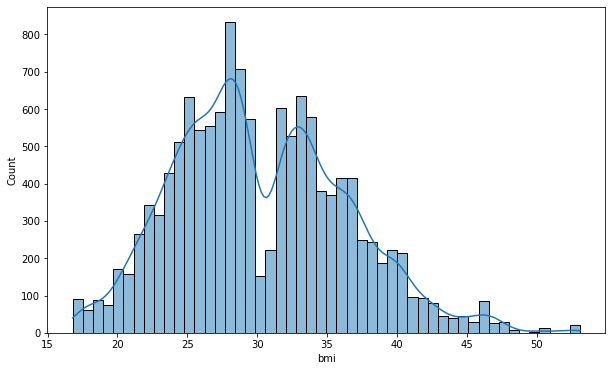

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df["bmi"], kde=True)
print(f"Skewness: {df['bmi'].skew()}")
print(f'Mean: {(df["bmi"].mean()):.0f}')
print(f'Median: {df["bmi"].median()}')
print(f'Minimum BMI: {df["bmi"].min()}')
print(f'Maximum BMI: {df["bmi"].max()}')

Text(0, 0.5, 'Sample quantiles')

<Figure size 720x432 with 0 Axes>

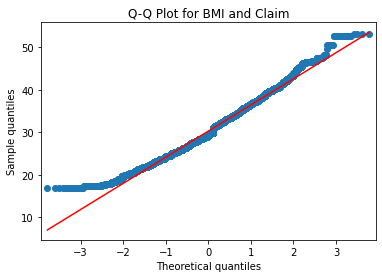

In [42]:
plt.figure(figsize=(10, 6))
sm.qqplot(df["bmi"], line='s')
plt.title("Q-Q Plot for BMI and Claim")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")

Text(0, 0.5, 'Claim')

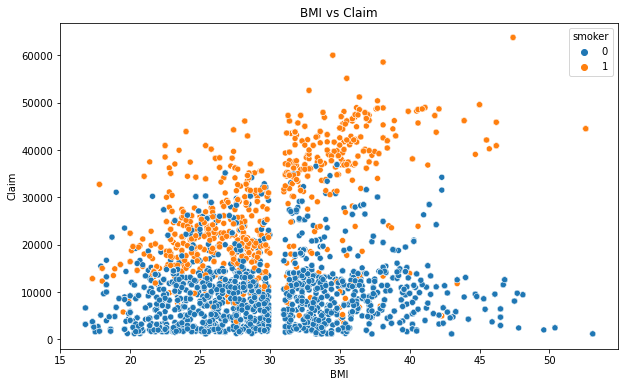

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='claim', data=df, hue='smoker')
plt.title('BMI vs Claim')
plt.xlabel('BMI')
plt.ylabel('Claim')

Mean normal BMI: 10607.897178557041
Mean extreme BMI: 14112.39641118633
Median normal BMI: 8604.5
Median extreme BMI: 9877.6


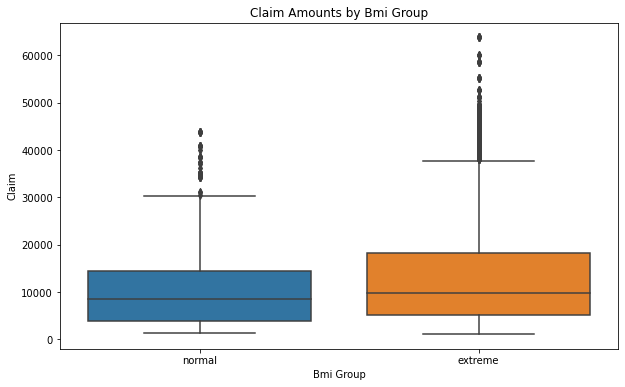

In [44]:
df["Bmi Group"] = np.where((df["bmi"] <= 25) & (df["bmi"] >= 18), "normal", "extreme")
plt.figure(figsize=(10, 6))
sns.boxplot(x="Bmi Group", y="claim", data=df)
plt.title("Claim Amounts by Bmi Group")
plt.xlabel("Bmi Group")
plt.ylabel("Claim")
print(f"Mean normal BMI: {df[(df['bmi'] <= 25) & (df['bmi'] >= 18)]['claim'].mean()}")
print(f"Mean extreme BMI: {df[(df['bmi'] > 25) | (df['bmi'] < 18)]['claim'].mean()}") 
print(f"Median normal BMI: {df[(df['bmi'] <= 25) & (df['bmi'] >= 18)]['claim'].median()}")
print(f"Median extreme BMI: {df[(df['bmi'] > 25) | (df['bmi'] < 18)]['claim'].median()}")

### Statistical Testing


In [45]:
print(kstest(df[(df["bmi"] <= 25) & (df["bmi"] >= 18)]["claim"], "norm"))
print(kstest(df[(df["bmi"] > 25) | (df["bmi"] < 18)]["claim"], "norm"))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


In [46]:
stat, p = levene(df[(df["bmi"] <= 25) & (df["bmi"] >= 18)]["claim"], df[(df["bmi"] > 25) | (df["bmi"] < 18)]["claim"], center="mean")
print("Statistics=%.3f, p=%.3f" % (stat, p))

Statistics=336.876, p=0.000


In [47]:
statistics, pwt = ttest_ind(df[(df["bmi"] <= 25) & (df["bmi"] >= 18)]["claim"], df[(df["bmi"] > 25) | (df["bmi"] < 18)]["claim"], equal_var=False)
print("Statistics=%.3f, p=%.3f" % (statistics, pwt))

if pwt < alpha:
    print("There is a significant difference in claims between people with normal vs extreme BMI")
else:
    print("There is no significant difference in claims people with normal vs extreme BMI")

# direction of the difference
if statistics > 0:
    print("The mean insurance claim of people with normal BMI is significantly higher.")
elif statistics < 0:
    print("The mean insurance claim of people with extreme BMI is significantly higher.")
else:
    print("There is no significant difference in the mean insurance claim amounts.")

Statistics=-16.566, p=0.000
There is a significant difference in claims between people with normal vs extreme BMI
The mean insurance claim of people with extreme BMI is significantly higher.


## Effect of regular exercise vs no regular exercise
### regular exercise = 1, no regular exercise = 0

In [48]:
df["regular_ex"].corr(df["claim"])

-0.06721878347128205

In [49]:
df["regular_ex"].skew()

1.3486256447940788

In [50]:
df["regular_ex"].value_counts()

0    10101
1     2857
Name: regular_ex, dtype: int64

Text(0.5, 1.0, 'Regular exercise Percentage')

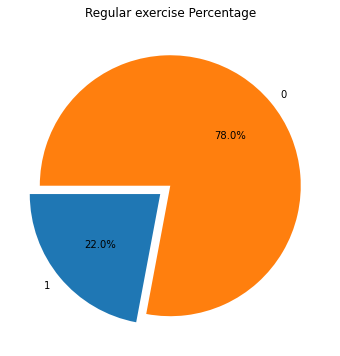

In [51]:
plt.figure(figsize=(10, 6))
plt.pie(df.regular_ex.value_counts().reindex([1, 0]), labels=df.regular_ex.value_counts().reindex([1, 0]).index,
        autopct='%1.1f%%', explode=[0.1, 0], startangle=180)
plt.title('Regular exercise Percentage')

Average Charges for regular exercise: $11904.67
Average Charges for No regular exercise: $13876.06
Median regular exercise: $10043.30
Median no regular exercise: $9617.70


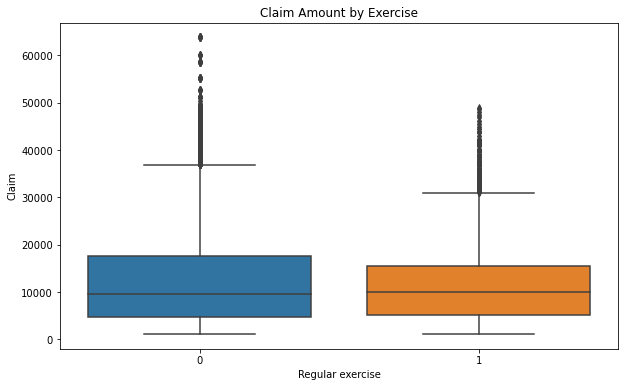

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='regular_ex', y='claim', data=df)
plt.title('Claim Amount by Exercise')
plt.xlabel('Regular exercise')
plt.ylabel('Claim')
print(f"Average Charges for regular exercise: ${(df[df.regular_ex == 1].claim.mean()):.2f}")
print(f"Average Charges for No regular exercise: ${(df[df.regular_ex == 0].claim.mean()):.2f}")
print(f"Median regular exercise: ${(df[df.regular_ex == 1].claim.median()):.2f}")
print(f"Median no regular exercise: ${(df[df.regular_ex == 0].claim.median()):.2f}")

Text(0, 0.5, 'Count')

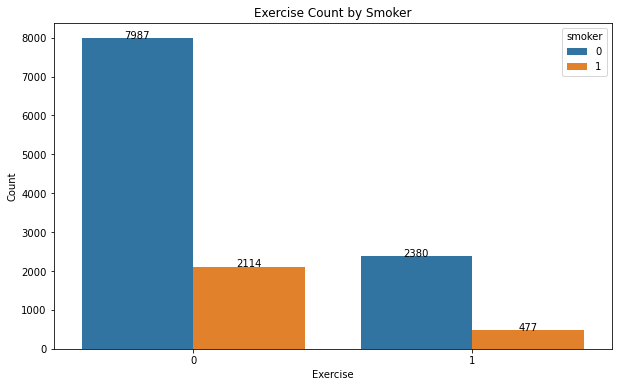

In [53]:
plt.figure(figsize=(10, 6))
fig = sns.countplot(x='regular_ex', data=df, hue='smoker')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2., height + 3, '{:1.0f}'.format(height), ha="center")
plt.title('Exercise Count by Smoker')
plt.xlabel('Exercise')
plt.ylabel('Count')

### Statistical Testing

In [54]:
print(kstest(df[df["regular_ex"] == 1]["claim"], "norm"))
print(kstest(df[df["regular_ex"] == 0]["claim"], "norm"))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


In [55]:
stat, p = levene(df[df["regular_ex"] == 1]["claim"], df[df["regular_ex"] == 0]["claim"], center="mean")
print("Statistics=%.3f, p=%.3f" % (stat, p))

Statistics=320.047, p=0.000


In [56]:
statistics, pwt = ttest_ind(df[df["regular_ex"] == 1]["claim"], df[df["regular_ex"] == 0]["claim"], equal_var=False)

print("Statistics=%.3f, p=%.3f" % (statistics, pwt))

if pwt < alpha:
    print("There is a significant difference in claims between people who exercise regularly and dont exercise regularly.")
else:
    print("There is no difference in claims between people who exercise regularly and dont exercise regularly.")

if statistics > 0:
    print("The mean insurance claim amount of people who exercise regularly is significantly higher than of people who dont exercise regularly")
elif statistics < 0:
    print("The mean insurance claim amount of people who dont exercise regularly is significantly higher than of people who exercise regularly")
else:
    print("There is no significant difference in the mean insurance claim amounts.")

Statistics=-9.300, p=0.000
There is a significant difference in claims between people who exercise regularly and dont exercise regularly.
The mean insurance claim amount of people who dont exercise regularly is significantly higher than of people who exercise regularly


## Effect of Hereditary Diseases

In [57]:
df["hereditary_diseases"].value_counts()

NoDisease       12108
Alzheimer         134
Diabetes          127
EyeDisease        107
Obesity           101
HeartDisease       93
Cancer             90
Arthritis          69
High BP            69
Epilepsy           60
Name: hereditary_diseases, dtype: int64

In [58]:
disease = df["hereditary_diseases"].unique()
print("Average claim of different diseases")
for i in disease:
    print(f"{i}: {df[df['hereditary_diseases'] == i]['claim'].mean()}")

Average claim of different diseases
NoDisease: 11605.197538817294
Epilepsy: 38189.99333333332
Alzheimer: 37671.60820895525
Arthritis: 33627.57101449277
EyeDisease: 41354.81308411214
HeartDisease: 43084.513978494586
Diabetes: 40032.90236220473
Cancer: 40637.522222222215
High BP: 40670.04637681161
Obesity: 39789.37821782176


### Barplot to visualize the mean claim

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Alzheimer'),
  Text(1, 0, 'Arthritis'),
  Text(2, 0, 'Cancer'),
  Text(3, 0, 'Diabetes'),
  Text(4, 0, 'Epilepsy'),
  Text(5, 0, 'EyeDisease'),
  Text(6, 0, 'HeartDisease'),
  Text(7, 0, 'High BP'),
  Text(8, 0, 'NoDisease'),
  Text(9, 0, 'Obesity')])

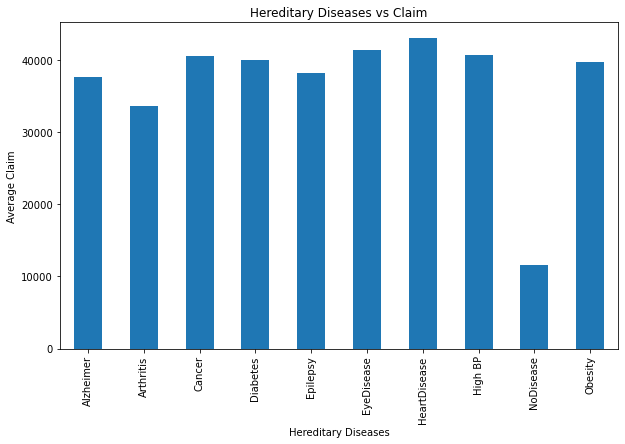

In [59]:
hereditary_claim_avg = df.groupby("hereditary_diseases")["claim"].mean()
plt.figure(figsize=(10, 6))
hereditary_claim_avg.plot(kind="bar", stacked=True)
plt.xlabel("Hereditary Diseases")
plt.ylabel("Average Claim")
plt.title("Hereditary Diseases vs Claim")
plt.xticks(rotation=90)

### Barplot to visualize total claim

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Alzheimer'),
  Text(1, 0, 'Arthritis'),
  Text(2, 0, 'Cancer'),
  Text(3, 0, 'Diabetes'),
  Text(4, 0, 'Epilepsy'),
  Text(5, 0, 'EyeDisease'),
  Text(6, 0, 'HeartDisease'),
  Text(7, 0, 'High BP'),
  Text(8, 0, 'NoDisease'),
  Text(9, 0, 'Obesity')])

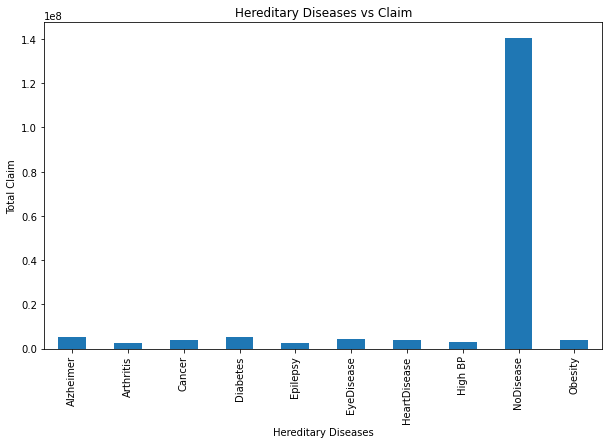

In [60]:
plt.figure(figsize=(10, 6))
hereditary_claim_total = df.groupby('hereditary_diseases')['claim'].sum()
hereditary_claim_total.plot(kind="bar", stacked=True)
plt.xlabel("Hereditary Diseases")
plt.ylabel("Total Claim")
plt.title("Hereditary Diseases vs Claim")
plt.xticks(rotation=90)

### Although the average claim with no disease is lowest the proportion of total claims is highest. Reason is the by far bigger number of people without diseases

### Boxplot

Text(0, 0.5, 'Claim')

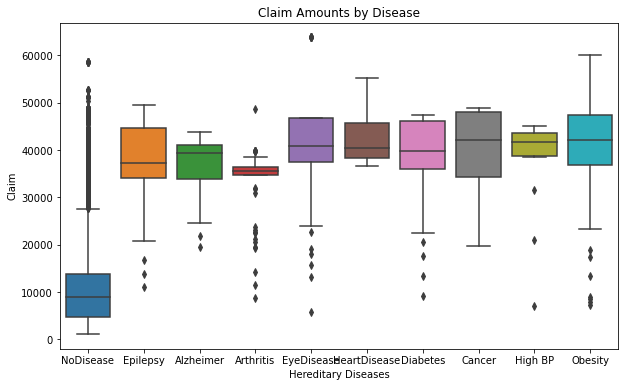

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="hereditary_diseases", y="claim", data=df)
plt.title("Claim Amounts by Disease")
plt.xlabel("Hereditary Diseases")
plt.ylabel("Claim")

### Statistical testing

In [62]:
NoDisease = df[df["hereditary_diseases"] == "NoDisease"]["claim"]
Epilepsy = df[df["hereditary_diseases"] == "Epilepsy"]["claim"]
Alzheimer = df[df["hereditary_diseases"] == "Alzheimer"]["claim"]
Arthritis = df[df["hereditary_diseases"] == "Arthritis"]["claim"]
EyeDisease = df[df["hereditary_diseases"] == "EyeDisease"]["claim"]
HeartDisease = df[df["hereditary_diseases"] == "HeartDisease"]["claim"]
Diabetes = df[df["hereditary_diseases"] == "Diabetes"]["claim"]
Cancer = df[df["hereditary_diseases"] == "Cancer"]["claim"]
High_BP = df[df["hereditary_diseases"] == "High BP"]["claim"]
Obesity = df[df["hereditary_diseases"] == "Obesity"]["claim"]

In [63]:
print(kstest(NoDisease, "norm"))
print(kstest(Epilepsy, "norm"))
print(kstest(Alzheimer, "norm"))
print(kstest(Arthritis, "norm"))
print(kstest(EyeDisease, "norm"))
print(kstest(HeartDisease, "norm"))
print(kstest(Diabetes, "norm"))
print(kstest(Cancer, "norm"))
print(kstest(High_BP, "norm"))
print(kstest(Obesity, "norm"))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


### Making new Dataframe with Diseases as one column and the corresponding claims in the second column

In [64]:
data = np.concatenate([NoDisease, Epilepsy, Alzheimer, Arthritis, EyeDisease, HeartDisease, Diabetes, Cancer, High_BP,
                       Obesity])

groups = np.concatenate([["NoDisease"] * 12108, ["Epilepsy"] * 60, ["Alzheimer"] * 134, ["Arthritis"] * 69,
                         ["EyeDisease"] * 107, ["HeartDisease"] * 93, ["Diabetes"] * 127, ["Cancer"] * 90, ["High_BP"]
                         * 69, ["Obesity"] * 101])
data = pd.DataFrame({"Data": data, "Group": groups})

### Anova

In [65]:
model = ols("Data ~ Group", data=data).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

               df        sum_sq       mean_sq           F  PR(>F)
Group         9.0  6.270935e+11  6.967705e+10  700.180672     0.0
Residual  12948.0  1.288494e+12  9.951296e+07         NaN     NaN


### Post-Hoc Tukey HSD test to see where differences lie

In [66]:
tukey_result = MultiComparison(data["Data"], data["Group"]).tukeyhsd()
print(tukey_result)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
   group1       group2      meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------------------
   Alzheimer    Arthritis  -4044.0372 0.1594  -8721.1751    633.1007  False
   Alzheimer       Cancer    2965.914 0.4696  -1335.9775   7267.8055  False
   Alzheimer     Diabetes   2361.2942 0.6613  -1547.7907    6270.379  False
   Alzheimer     Epilepsy    518.3851    1.0  -4384.8412   5421.6115  False
   Alzheimer   EyeDisease   3683.2049 0.1208   -409.1504   7775.5602  False
   Alzheimer HeartDisease   5412.9058 0.0024   1152.7237   9673.0878   True
   Alzheimer      High_BP   2998.4382 0.5787  -1678.6997   7675.5761  False
   Alzheimer    NoDisease -26066.4107    0.0 -28808.2796 -23324.5418   True
   Alzheimer      Obesity     2117.77 0.8432  -2041.6229   6277.1629  False
   Arthritis       Cancer   7009.9512 0.0005   1959.1315  12060.7709   True
   Arthritis

## Effect of Jobs on claim

In [67]:
df["job_title"].value_counts()

Student              1115
HomeMakers            899
FilmMaker             654
Singer                637
HouseKeeper           611
Dancer                606
Actor                 593
Manager               567
Accountant            333
Politician            326
Photographer          320
Police                318
FashionDesigner       312
Beautician            301
ITProfessional        301
DataScientist         298
Engineer              296
Architect             295
Clerks                291
CEO                   283
Doctor                274
FilmDirector          273
Blogger               267
Lawyer                261
DefencePersonnels     251
CA                    250
Chef                  247
Journalist            246
Analyst               241
Academician           232
GovEmployee           226
Technician            211
Buisnessman           211
Farmer                210
Labourer              202
Name: job_title, dtype: int64

In [68]:
jobs = df["job_title"].unique()
avg_job_claim = []
print("Average claim of different jobs")
for i in jobs:
    print(f"{i}: {df[df['job_title'] == i]['claim'].mean()}")

Average claim of different jobs
Actor: 13706.835750421595
Engineer: 14706.232094594618
Academician: 15236.729310344821
Chef: 9825.142105263158
HomeMakers: 13069.078531701865
Dancer: 15075.450165016491
Singer: 13059.784929356345
DataScientist: 14468.992617449645
Doctor: 12485.696715328468
Student: 11445.191210762332
Manager: 16063.138095238073
Photographer: 14946.005937499993
Beautician: 12531.510963455126
CA: 14027.700400000027
Blogger: 8497.218726591767
CEO: 16416.609540636036
Labourer: 7620.457920792076
Accountant: 15820.817117117107
FilmDirector: 11347.33223443224
Technician: 9608.175829383877
FashionDesigner: 12668.232692307709
Police: 13729.326729559758
Architect: 15711.697627118634
HouseKeeper: 14296.80474631752
FilmMaker: 15747.787461773692
Buisnessman: 13471.40616113745
DefencePersonnels: 9362.48247011953
Analyst: 8501.58921161824
Clerks: 17673.291065292095
Politician: 14472.210736196337
ITProfessional: 15820.310631229215
Farmer: 7891.138571428562
Journalist: 16289.826016260144

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Academician'),
  Text(1, 0, 'Accountant'),
  Text(2, 0, 'Actor'),
  Text(3, 0, 'Analyst'),
  Text(4, 0, 'Architect'),
  Text(5, 0, 'Beautician'),
  Text(6, 0, 'Blogger'),
  Text(7, 0, 'Buisnessman'),
  Text(8, 0, 'CA'),
  Text(9, 0, 'CEO'),
  Text(10, 0, 'Chef'),
  Text(11, 0, 'Clerks'),
  Text(12, 0, 'Dancer'),
  Text(13, 0, 'DataScientist'),
  Text(14, 0, 'DefencePersonnels'),
  Text(15, 0, 'Doctor'),
  Text(16, 0, 'Engineer'),
  Text(17, 0, 'Farmer'),
  Text(18, 0, 'FashionDesigner'),
  Text(19, 0, 'FilmDirector'),
  Text(20, 0, 'FilmMaker'),
  Text(21, 0, 'GovEmployee'),
  Text(22, 0, 'HomeMakers'),
  Text(23, 0, 'HouseKeeper'),
  Text(24, 0, 'ITProfessional'),
  Text(25, 0, 'Journalist'),
  Text(26, 0, 'Labourer'),
  Text(27, 0, 'Lawyer'),
  Text(28, 0, 'Manager'),
  Text(29, 0, 'Photographer'),
  Text(3

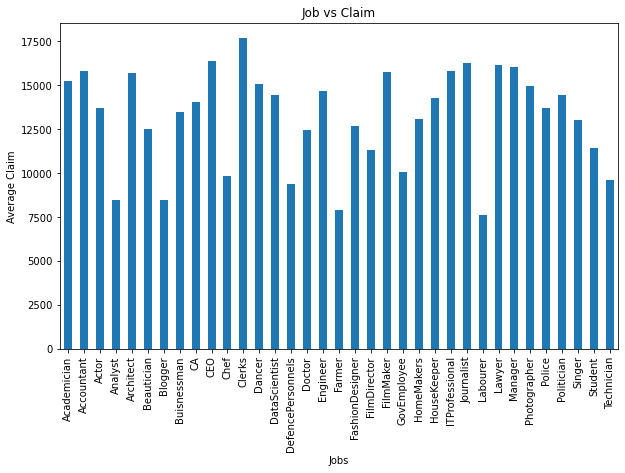

In [69]:
job_claim_avg = df.groupby('job_title')['claim'].mean()
plt.figure(figsize=(10, 6))
job_claim_avg.plot(kind="bar", stacked=True)
plt.xlabel("Jobs")
plt.ylabel("Average Claim")
plt.title("Job vs Claim")
plt.xticks(rotation=90)

# Data modelling
### Four models were trained and compared (Linear Regression, Polynomial Regression, Random Forest Regressor, Gradient Boosting Regressor)

#### Preprocessing the data to change categorical values to numbers, as machine learning cant use string attributes

In [70]:
model_df = orig_df.copy()

In [71]:
for X in ["hereditary_diseases", "job_title", "city", "sex"]:
    exec(f"le_{X} = preprocessing.LabelEncoder()")

    exec(f"model_df.{X} = le_{X}.fit_transform(model_df.{X})")

In [72]:
model_df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,1,64,24.3,8,1,0,55,72,0,0,2,13112.6
1,49.0,0,75,22.6,8,1,0,5,78,1,1,16,9567.0
2,32.0,0,64,17.8,4,2,1,63,88,1,1,0,32734.2
3,61.0,0,53,36.4,8,1,1,64,72,1,0,10,48517.6
4,19.0,0,50,20.6,8,0,0,8,82,1,0,22,1731.7


In [73]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  int32  
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  int32  
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  int32  
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  int32  
 12  claim                15000 non-null  float64
dtypes: float64(3), int32(4), int64(6)
memory usage: 1.3 MB


In [74]:
model_df.dropna(axis=0, inplace=True)
model_df.drop(df.loc[df["bloodpressure"] == 0].index, inplace=True)

In [75]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13648 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  13648 non-null  float64
 1   sex                  13648 non-null  int32  
 2   weight               13648 non-null  int64  
 3   bmi                  13648 non-null  float64
 4   hereditary_diseases  13648 non-null  int32  
 5   no_of_dependents     13648 non-null  int64  
 6   smoker               13648 non-null  int64  
 7   city                 13648 non-null  int32  
 8   bloodpressure        13648 non-null  int64  
 9   diabetes             13648 non-null  int64  
 10  regular_ex           13648 non-null  int64  
 11  job_title            13648 non-null  int32  
 12  claim                13648 non-null  float64
dtypes: float64(3), int32(4), int64(6)
memory usage: 1.2 MB


### Feature selection using SelectKBest and f_regression (8 best were selected)

In [76]:
features = list(model_df.columns[:12])
print("features:", features, sep="\n")

features:
['age', 'sex', 'weight', 'bmi', 'hereditary_diseases', 'no_of_dependents', 'smoker', 'city', 'bloodpressure', 'diabetes', 'regular_ex', 'job_title']


In [77]:
y = model_df["claim"]
X = model_df[features]

In [78]:
selector = SelectKBest(f_regression, k=8)
selector.fit(X, y)

X_new = selector.transform(X)
print(model_df.columns[selector.get_support(indices=True)].tolist())
final_features = model_df.columns[selector.get_support(indices=True)].tolist()

['age', 'weight', 'bmi', 'hereditary_diseases', 'no_of_dependents', 'smoker', 'diabetes', 'regular_ex']


### Splitting data in training and testing set using 85 % of data for training

In [79]:
y = model_df["claim"]
X = model_df[final_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, train_size=.85)

#### Linear Regression

In [80]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

##### Evaluating Training Score using (.score and mean absolute error)

In [81]:
print(f"Training Score: {LR.score(X_train, y_train)}")
print(f"Training MAE: {mean_absolute_error(y_train, LR.predict(X_train))}")

Training Score: 0.7422898981459986
Training MAE: 4134.421571383333


#### Score on Test data

In [82]:
print(f"Test Score: {LR.score(X_test, y_test)}")
print(f"Test MAE: {mean_absolute_error(y_test, LR.predict(X_test))}")

Test Score: 0.7618462107547354
Test MAE: 3939.2076629097373


## Polynomial Regression
### Creating Pipelines to perform scaling and dimensionality reduction

In [83]:
num_pipe = Pipeline([("scaling", StandardScaler())])

cat_pipe = Pipeline([("encode", OneHotEncoder(handle_unknown="ignore"))])

preprocess = ColumnTransformer([
    ("num", num_pipe, X_train.select_dtypes(include=["float64", "int64"]).columns),
    ("cat", cat_pipe, X_train.select_dtypes(include=["object"]).columns)
])

poly_lr_pipe = Pipeline([("preprocessing", preprocess), ("pca", PCA(n_components=.95)), ("poly", PolynomialFeatures()),
                         ("model", LinearRegression())])

In [84]:
poly_params = {"poly__degree": [3, 4, 5, 6]}

poly = GridSearchCV(poly_lr_pipe, param_grid=poly_params, cv=2 ,n_jobs=1)

poly.fit(X_train, y_train)

print(poly.best_params_)

{'poly__degree': 4}


#### best hyperparameter = 4

#### training set

In [85]:
print(f"Training Score: {poly.score(X_train, y_train)}")
print(f"Training MAE: {mean_absolute_error(y_train, poly.predict(X_train))}")

Training Score: 0.8238759686115625
Training MAE: 3206.1468663793103


#### Testing set

In [86]:
print(f"Testing Score: {poly.score(X_test, y_test)}")
print(f"Testing MAE: {mean_absolute_error(y_test, poly.predict(X_test))}")

Testing Score: 0.8389304029925978
Testing MAE: 2993.615258789063


## Random Forest Regressor

In [87]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)

RandomForestRegressor()

#### Training set

In [88]:
print(f"Training Score: {RF.score(X_train, y_train)}")
print(f"Training MAE: {mean_absolute_error(y_train, RF.predict(X_train))}")

Training Score: 0.9960384944239864
Training MAE: 139.31350132930945


#### Testing set

In [89]:
print(f"Test Score: {RF.score(X_test, y_test)}")
print(f"Test MAE: {mean_absolute_error(y_test, RF.predict(X_test))}")

Test Score: 0.9686207226396426
Test MAE: 348.88827809497843


#### Gradient Boosting Regressor

In [90]:
GR = GradientBoostingRegressor()
GR.fit(X_train, y_train)

GradientBoostingRegressor()

#### Training set

In [91]:
print(f"Training Score: {GR.score(X_train, y_train)}")
print(f"Training MAE: {mean_absolute_error(y_train, GR.predict(X_train))}")

Training Score: 0.8648971640087179
Training MAE: 2668.109841194563


#### Testing set

In [92]:
print(f"Test Score: {GR.score(X_test, y_test)}")
print(f"Test MAE: {mean_absolute_error(y_test, GR.predict(X_test))}")

Test Score: 0.8732801286829555
Test MAE: 2536.5111245291764


### Comparing predicted values to actual claim

In [93]:
df_result = pd.DataFrame({"Actual claim": y_test,
                          f"LR {LR.score(X_test, y_test):.2f}": LR.predict(X_test),
                          f"Poly {poly.score(X_test, y_test):.2f}": poly.predict(X_test),
                          f"RF {RF.score(X_test, y_test):.2f}": RF.predict(X_test),
                          f"GR {GR.score(X_test, y_test):.2f}": GR.predict(X_test),
                          })

In [94]:
df_result.head(15)

,Actual claim,LR 0.76,Poly 0.84,RF 0.97,GR 0.87
10360,3208.8,3341.888277,4861.0,3208.800,4727.382844
7339,7265.7,11137.795333,8808.5,7265.700,8366.711800
14798,18838.7,4032.015388,12221.0,18838.700,9653.087428
5714,13415.0,10876.212888,11565.0,13417.014,14375.676315
9924,8347.2,12082.042729,9477.0,8347.200,10257.708085
6503,6184.3,7885.143348,7548.5,6184.300,7339.730265
7377,11534.9,10864.144583,10661.0,11534.900,11178.170054
5331,13470.8,16829.884867,12795.0,13470.800,13526.162347
11225,1837.3,3095.570969,4089.0,1837.300,4452.812159
11218,20878.8,12012.626674,10101.5,20878.800,10839.987095


# Conclusions